In [101]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [72]:
rs = 0
X, y = make_circles(300, noise=0.1, random_state=rs)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,
random_state=rs)


In [73]:
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
rs = 0
X1, y1 = make_classification(300, random_state=rs)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.2,
random_state=rs)

In [74]:
def plotDataset(X, y ,TT):
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=label )
  plt.legend()
  plt.title(TT)
  plt.show()

def plotEstimator(trX, trY, teX, teY, estimator, title=''):
  estimator = clone(estimator).fit(trX, trY)                   #Constructs a new unfitted estimator with the same parameters.
  h = .02
  x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
  y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  # plt.legend()
  plt.title(title)
  plt.show()

In [75]:
x_train1.shape
x_test1.shape

(60, 2)

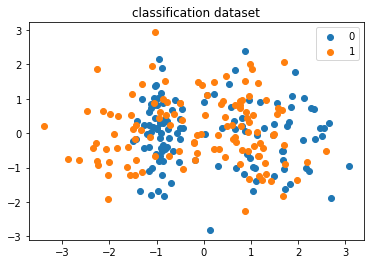

In [76]:

plotDataset(x_train1,y_train1 ,TT='circle dataset')
plotDataset(x_train2,y_train2 ,TT='classification dataset')


Q4 :decision tree on the Circle Dataset

Accuracy =  0.6666666666666666


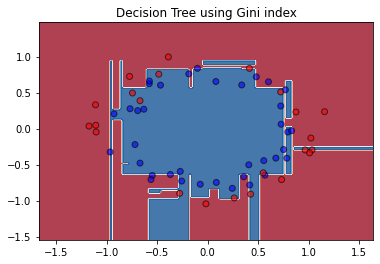

In [77]:
estimator = DecisionTreeClassifier(random_state=rs , criterion='gini')  #default=”gini”
estimator.fit(x_train1, y_train1)
y_pred = estimator.predict(x_test1)
dtAccuracy = accuracy_score(y_test1, y_pred)
print('Accuracy = ',dtAccuracy)
plotEstimator(x_train1, y_train1, x_test1, y_test1,estimator, 'Decision Tree using Gini index')

Accuracy =  0.75


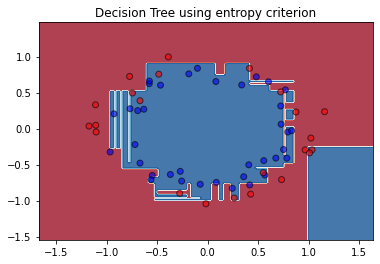

In [78]:
estimator1 = DecisionTreeClassifier(random_state=rs ,criterion='entropy')
estimator1.fit(x_train1, y_train1)
y_pred1 = estimator1.predict(x_test1)
dtAccuracy1 = accuracy_score(y_test1, y_pred1)
print('Accuracy = ',dtAccuracy1)
plotEstimator(x_train1, y_train1, x_test1, y_test1,estimator1, 'Decision Tree using entropy criterion')

Q5: Classification Dataset.

In [93]:
model = DecisionTreeClassifier(random_state=rs ) 
model.fit(x_train2, y_train2)
importances = model.feature_importances_
indices = np.argsort(-importances)
ind = indices[0:7]
x_train_new = x_train2[ :, ind]
x_test_new = x_test2[ :, ind]


In [154]:
#get the indices of the important features 
imp_features = []
imp_features_test = []
for i in range(7):
  list1 = x_train_new[:,0:i+1]
  list2 = x_test_new[:,0:i+1]
  imp_features.append(list1)
  imp_features_test.append(list2)


In [143]:
scores_validation = []
for i in range(len(imp_features)):
  DT=DecisionTreeClassifier(random_state=rs) 
  score = cross_val_score(DT, imp_features[i],y_train2 , cv=4)
  scores_validation.append(score)

In [166]:
scores_test = []
for i in range(len(imp_features_test)):
  DT=DecisionTreeClassifier(random_state=rs) 
  DT.fit(imp_features[i],y_train2)
  y_pr = DT.predict(imp_features_test[i])
  Acc  = accuracy_score(y_test2,y_pr)
  #score = cross_val_score(DT, imp_features[i],y_train2 )
  scores_test.append(Acc)

In [151]:
x=[0,1,2,3,4,5,6]

Text(0.5, 1.0, 'test accuracy for important features')

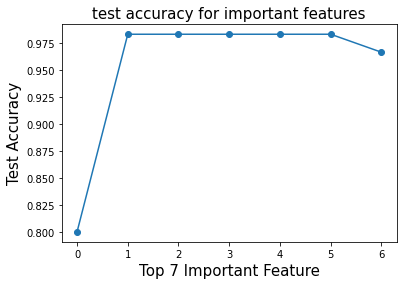

In [185]:
plt.plot(x,scores_test, marker='o')
plt.xlabel('Top 7 Important Feature',fontsize = 15)
plt.ylabel('Test Accuracy',fontsize = 15)
plt.title('test accuracy for important features',fontsize = 15)

Text(0.5, 1.0, 'validation accuracy for important features')

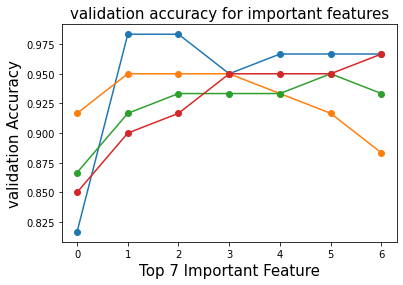

In [186]:
plt.plot(x,scores , marker='o')
plt.xlabel('Top 7 Important Feature',fontsize = 15)
plt.ylabel('validation Accuracy',fontsize = 15)
plt.title('validation accuracy for important features',fontsize = 15)

bagging Q(6)

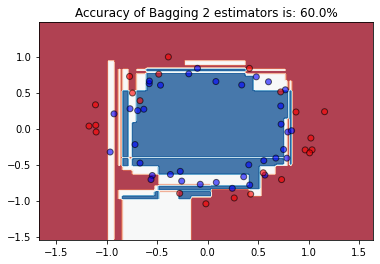

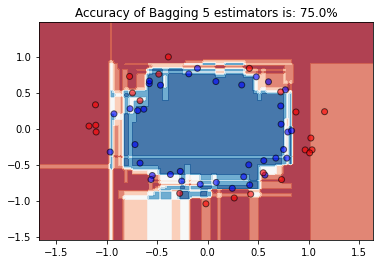

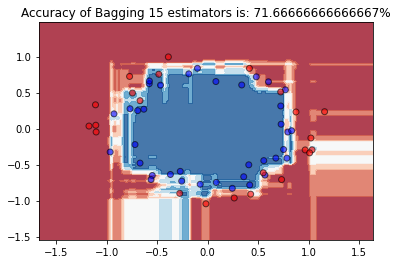

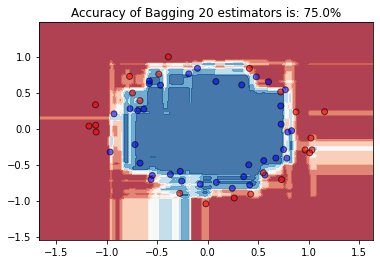

In [190]:

for nEst in (2,5,15,20):
 
  estimator = BaggingClassifier(n_estimators=nEst, random_state=rs)
  score = estimator.fit(x_train1, y_train1).score(x_test1, y_test1)
  plotEstimator(x_train1, y_train1, x_test1, y_test1, estimator, f'Accuracy of Bagging {nEst} estimators is: {score*100}%')

Random forest Q(8)

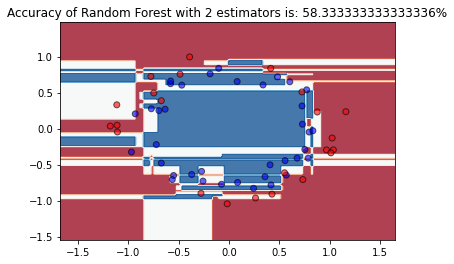

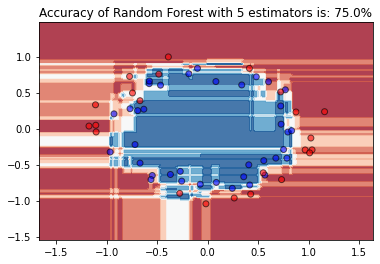

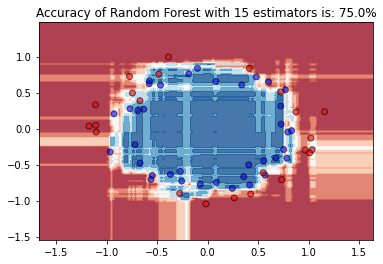

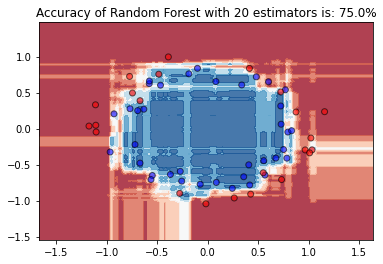

In [192]:
for nEst in (2,5,15,20):
  estmator = RandomForestClassifier(n_estimators=nEst, random_state=rs)
  score = estmator.fit(x_train1, y_train1).score(x_test1, y_test1)
  plotEstimator(x_train1, y_train1, x_test1, y_test1, estmator, f'Accuracy of Random Forest with {nEst} estimators is: {score*100}%' )

Boosting

In [197]:
x=645.5588
g = float("{:.2f}".format(x))
g

645.56

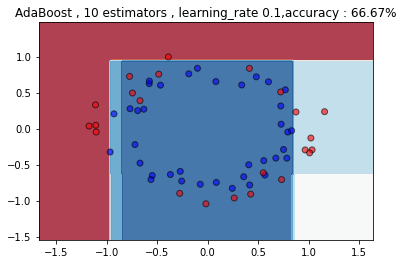

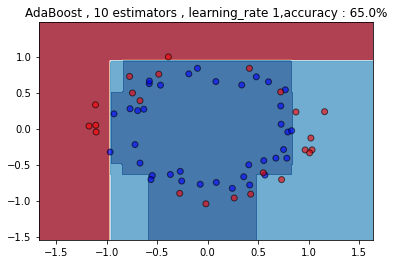

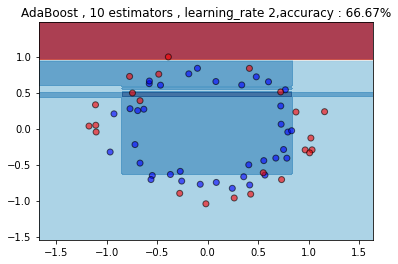

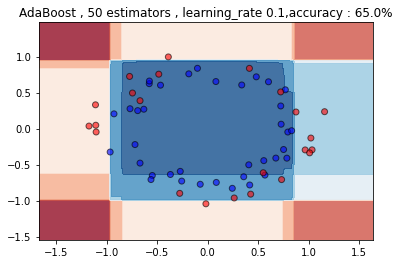

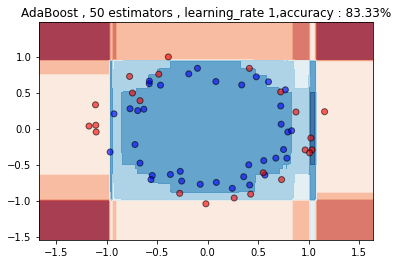

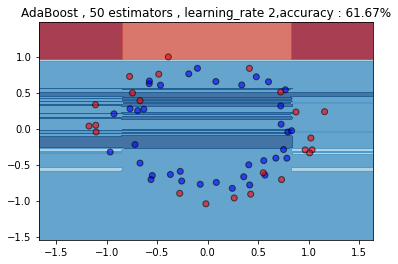

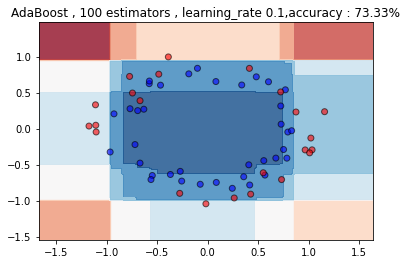

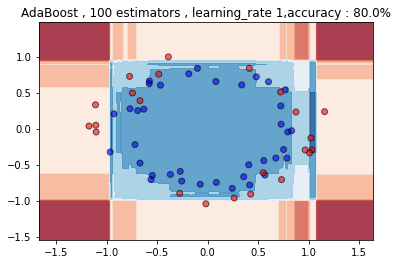

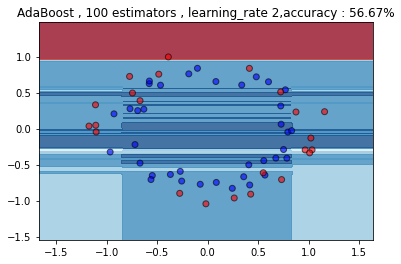

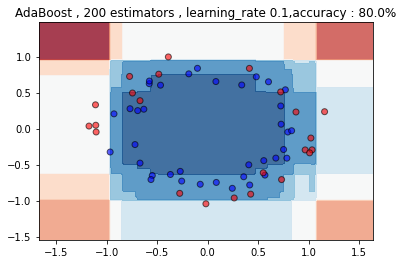

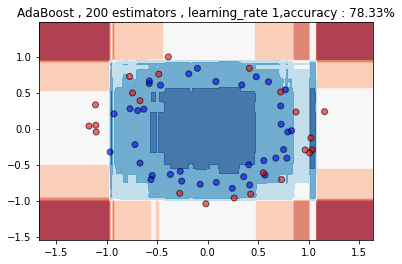

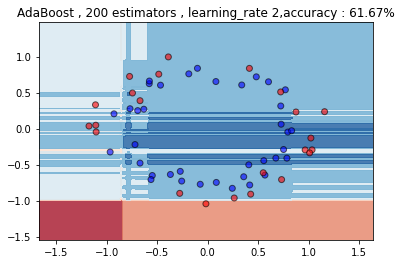

In [199]:
No_estimators = [10,50,100,200]
learn_rate =[0.1 ,1 ,2]
for nES in No_estimators:
  #i=0
  for i,LR in enumerate(learn_rate):
    #i+=1
    model = AdaBoostClassifier(n_estimators=nES , learning_rate= LR)
    score = model.fit(x_train1, y_train1).score(x_test1, y_test1)
    score = float("{:.2f}".format(score*100))
    #plt.subplot(4,3,i+1)
    plotEstimator(x_train1, y_train1, x_test1, y_test1, model, f'AdaBoost , {nES} estimators , learning_rate {LR},accuracy : {score}%')
#plt.show    

Stacking Q(11)

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')


rs = 0
estimators = [DecisionTreeClassifier(random_state=rs), AdaBoostClassifier(n_estimators=50 , learning_rate= 1), 
              BaggingClassifier(n_estimators=5, random_state=rs) ,RandomForestClassifier(n_estimators=5, random_state=rs)]
estimators = {estimator.__class__.__name__: estimator for estimator in estimators}

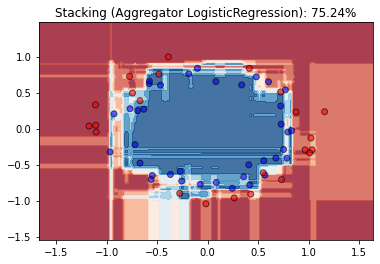

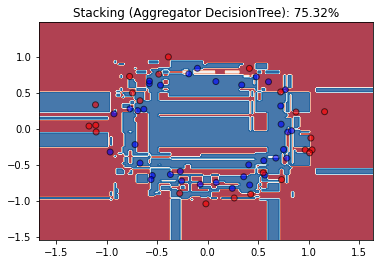

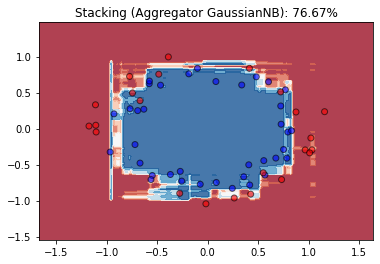

In [214]:
stacking1 = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], LogisticRegression(random_state=rs), n_jobs=-1)
stacking1.fit(x_train1, y_train1)
predY = stacking1.predict(x_test1)
f1 = f1_score(y_test1, predY, average='weighted')
f1 = float("{:.2f}".format(f1*100))
plotEstimator(x_train1, y_train1, x_test1, y_test1, stacking1 ,f'Stacking (Aggregator LogisticRegression): {f1}%')

stacking2 = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], DecisionTreeClassifier(random_state=rs), n_jobs=-1)
stacking2.fit(x_train1, y_train1)
predY = stacking2.predict(x_test1)
f2 = f1_score(y_test1, predY, average='weighted')
f2 = float("{:.2f}".format(f2*100))
plotEstimator(x_train1, y_train1, x_test1, y_test1, stacking2 ,f'Stacking (Aggregator DecisionTree): {f2}%')

stacking3 = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], GaussianNB(), n_jobs=-1)
stacking3.fit(x_train1, y_train1)
predY = stacking3.predict(x_test1)
f3 = f1_score(y_test1, predY, average='weighted')
f3 = float("{:.2f}".format(f3*100))
plotEstimator(x_train1, y_train1, x_test1, y_test1, stacking3 ,f'Stacking (Aggregator GaussianNB): {f3}%')